In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [116]:
data=pd.read_csv("titanic-passengers.csv",sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [117]:
data.shape

(891, 12)

####  Preprocessing

In [118]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [119]:
data=data.drop(columns_to_drop,axis=1)

In [120]:
# Using Median value for Age
data['Age'].fillna(data['Age'].median(), inplace=True)

#### split data

In [122]:
X=data.drop("Survived",axis=1)
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)

#### afficher le tree

In [113]:
# from sklearn import preprocessing 
# #convert objects / non-numeric data types into numeric
# for f in data.columns:
#     if data[f].dtype=='object':
#         lbl = preprocessing.LabelEncoder()
#         lbl.fit(list(data[f].values)) 
#         data[f] = lbl.transform(list(data[f].values))

In [114]:
# from sklearn.tree import DecisionTreeClassifier
# classifier=tree.DecisionTreeClassifier()
# classifier=classifier.fit(X_train_p,y_train)

In [115]:
# from sklearn.tree import export_graphviz
# from sklearn import tree
# cols = list(X_train.columns.values)
# tree.export_graphviz(classifier, out_file='tree.dot',feature_names  = cols)

In [123]:
#pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
numeric_transformer = Pipeline(steps=[
   ('scaler',RobustScaler()),])

In [124]:
num_columns = X.columns[X.dtypes != 'object']
cat_columns = X.columns[X.dtypes == 'object']

In [125]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer,num_columns ),
        ('cat', categorical_transformer,cat_columns)
    ]
)

####  DecisionTreeClassifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe = Pipeline([
        ('transformer', preprocessor),
        ('classifier', DecisionTreeClassifier()),
    ])

tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [133]:
y_pred_tree=tree_pipe.predict(X_test)

In [134]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))

              precision    recall  f1-score   support

          No       0.87      0.80      0.83       137
         Yes       0.72      0.80      0.76        86

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.80      0.80       223

[[110  27]
 [ 17  69]]


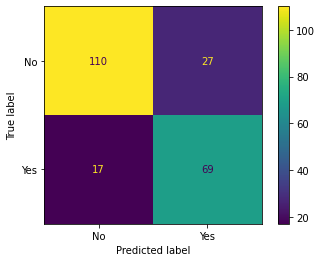

In [135]:
cfm=confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=tree_pipe.classes_)
disp.plot() 

In [137]:
tree_pipe2 = Pipeline([
        ('transformer', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)),
    ])

tree_pipe2.fit(X_train,y_train)
y_pred_tree2=tree_pipe2.predict(X_test)
print(classification_report(y_test,y_pred_tree2))
print(confusion_matrix(y_test,y_pred_tree2))


              precision    recall  f1-score   support

          No       0.87      0.86      0.86       137
         Yes       0.78      0.79      0.79        86

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223

[[118  19]
 [ 18  68]]


#lorsque on a changé , le score augmente 

#### RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([
        ('transformer', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100)),
    ])

rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [14]:
y_pred_rf=rf_pipe.predict(X_test)

In [15]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

          No       0.87      0.85      0.86       137
         Yes       0.77      0.80      0.78        86

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

[[116  21]
 [ 17  69]]


In [16]:
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))

Accuracy:  0.8295964125560538


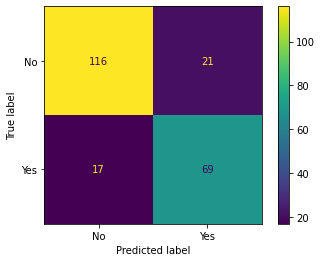

In [17]:
cfm=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=rf_pipe.classes_)
disp.plot() 

In [138]:

rf_pipe2 = Pipeline([
        ('transformer', preprocessor),
        ('classifier', RandomForestClassifier(bootstrap=True,criterion='gini',max_features='auto',n_estimators=100)),
    ])

rf_pipe2.fit(X_train,y_train)
y_pred_rf2=rf_pipe2.predict(X_test)
print(classification_report(y_test,y_pred_rf2))
print(confusion_matrix(y_test,y_pred_rf2))

              precision    recall  f1-score   support

          No       0.88      0.82      0.85       137
         Yes       0.74      0.81      0.78        86

    accuracy                           0.82       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.82      0.82       223

[[113  24]
 [ 16  70]]


In [139]:
#le premier resultat est le meilleur
#donc il faut choisir le bon parametre pour avoir le bon resultat